# COVID-19 Dataset Analysis

## Introduction
This notebook presents an analysis of COVID-19 data, focusing on the trends of confirmed cases, deaths, and recoveries across different states and regions. The analysis aims to provide insights into the pandemic's impact over time.

## Import Libraries
We will start by importing the necessary libraries for our analysis.

In [3]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns 

## Load the Dataset
Next, we will load the COVID-19 dataset. 

In [9]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\Python Data Analysis\Covid_19_data.csv")

### Display the first few rows of the dataset

In [17]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


### Get basic information about the dataset

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


### Check for missing values

In [26]:
missing_values = data.isnull().sum()

In [28]:
print(missing_values)

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64


### Summary statistics

In [164]:
print(data.describe())

                      Date      Confirmed        Deaths      Recovered
count                  321     321.000000    321.000000     321.000000
mean   2020-04-29 00:00:00    9949.800623    709.152648    3030.277259
min    2020-04-29 00:00:00       0.000000      0.000000       0.000000
25%    2020-04-29 00:00:00     104.000000      2.000000       2.000000
50%    2020-04-29 00:00:00     653.000000     12.000000      73.000000
75%    2020-04-29 00:00:00    4655.000000    144.000000     587.000000
max    2020-04-29 00:00:00  299691.000000  27682.000000  132929.000000
std                    NaN   31923.853086   3236.162817   14364.870365


### Converting Data types

####  Convert 'Date' column to datetime format

In [31]:
data['Date'] = pd.to_datetime(data['Date'])

## Data Analysis

#### Confirmed cases Analysis

#### Total confirmed cases

In [29]:
total_confirmed = data['Confirmed'].sum()

In [96]:
print(f'Total Confirmed Cases: {total_confirmed}')


Total Confirmed Cases: 3193886


#### Daily confirmed cases

In [79]:
daily_confirmed = data.groupby('Date')['Confirmed'].sum().reset_index()

In [81]:
print(daily_confirmed)

        Date  Confirmed
0 2020-04-29    3193886


#### Death Analysis

#### Total deaths

In [40]:
total_deaths = data['Deaths'].sum()

In [42]:
print(f'Total Deaths: {total_deaths}')

Total Deaths: 227638


#### Daily deaths

In [101]:
daily_deaths = data.groupby('Date')['Deaths'].sum().reset_index()


In [103]:
print(daily_deaths)

        Date  Deaths
0 2020-04-29  227638


### Recovered Cases Analysis

#### Total recovered cases

In [48]:
total_recovered = data['Recovered'].sum()

In [50]:
print(f'Total Recovered Cases: {total_recovered}')

Total Recovered Cases: 972719


#### Daily recovered cases

In [52]:
daily_recovered = data.groupby('Date')['Recovered'].sum().reset_index()

In [54]:
print(daily_recovered)

        Date  Recovered
0 2020-04-29     972719


### Comparative Analysis

#### Comparison of Confirmed, Deaths, and Recovered

#### Total counts

In [129]:
total_counts = pd.DataFrame({
    'Total Confirmed': [total_confirmed],
    'Total Deaths': [total_deaths],
    'Total Recovered': [total_recovered]
})


In [131]:
print(total_counts)

   Total Confirmed  Total Deaths  Total Recovered
0          3193886        227638           972719


#### Bar plot for total counts

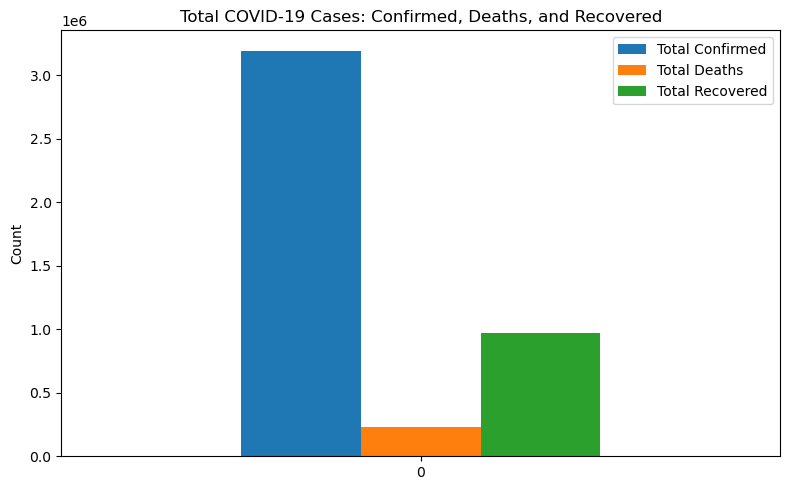

In [158]:
total_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Total COVID-19 Cases: Confirmed, Deaths, and Recovered')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Recovery Rate and Mortality Rate

#### Calculate recovery rate and mortality rate

In [58]:
recovery_rate = (total_recovered / total_confirmed) * 100

In [60]:
mortality_rate = (total_deaths / total_confirmed) * 100

In [62]:
print(f'Recovery Rate: {recovery_rate:.2f}%')

Recovery Rate: 30.46%


In [64]:
print(f'Mortality Rate: {mortality_rate:.2f}%')

Mortality Rate: 7.13%


### Conclusion

#### Summarize findings

In [66]:
print("In conclusion:")
print(f"Total Confirmed Cases: {total_confirmed}")
print(f"Total Deaths: {total_deaths}")
print(f"Total Recovered Cases: {total_recovered}")
print(f"Recovery Rate: {recovery_rate:.2f}%")
print(f"Mortality Rate: {mortality_rate:.2f}%")


In conclusion:
Total Confirmed Cases: 3193886
Total Deaths: 227638
Total Recovered Cases: 972719
Recovery Rate: 30.46%
Mortality Rate: 7.13%


### Group the data by Region and sum the cases

In [38]:
region_data = data.groupby('Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

### Calculate additional metrics

In [68]:
region_data['Active'] = region_data['Confirmed'] - region_data['Deaths'] - region_data['Recovered']
region_data['Mortality_Rate'] = (region_data['Deaths'] / region_data['Confirmed']) * 100
region_data['Recovery_Rate'] = (region_data['Recovered'] / region_data['Confirmed']) * 100

### Sort the data by total confirmed cases

In [73]:
region_data = region_data.sort_values('Confirmed', ascending=False)

### Display the top 10 regions by confirmed cases

In [78]:
print(region_data.head())

     Region  Confirmed  Deaths  Recovered  Active  Mortality_Rate  \
174      US    1039909   60967     120720  858222        5.862725   
158   Spain     236899   24275     132929   79695       10.246983   
83    Italy     203591   27682      71252  104657       13.596868   
59   France     166543   24121      49118   93304       14.483347   
173      UK     166441   26166        857  139418       15.720886   

     Recovery_Rate  
174      11.608708  
158      56.112098  
83       34.997618  
59       29.492684  
173       0.514897  


###  Visualization 1: Bar plot of confirmed cases by region

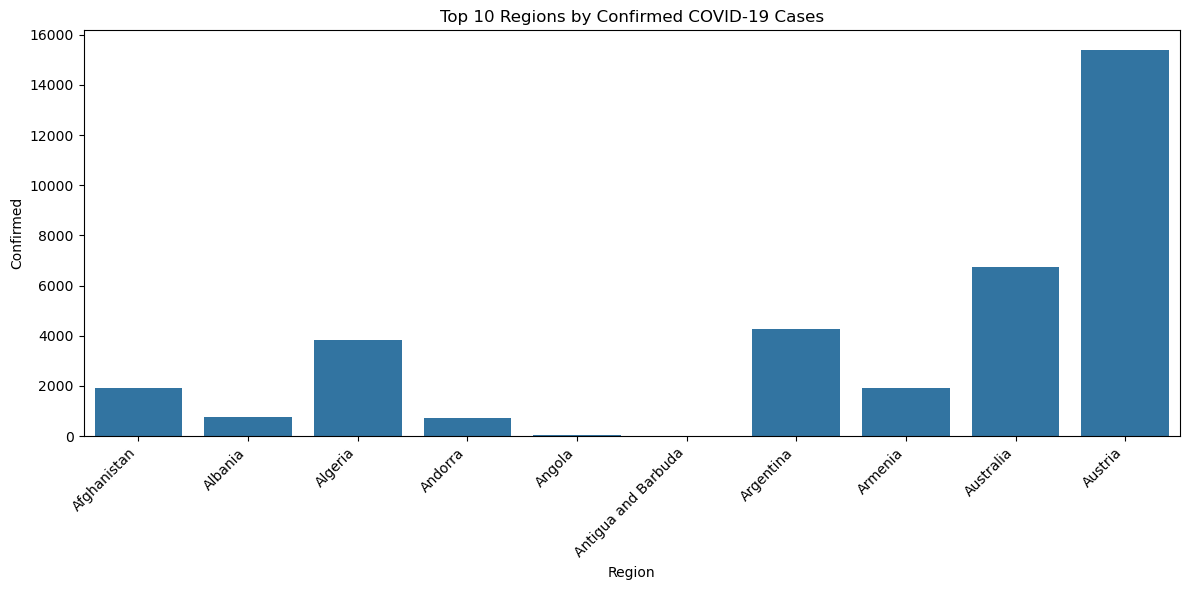

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Confirmed', data=region_data.head(10))
plt.title('Top 10 Regions by Confirmed COVID-19 Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###  Visualization 2: Stacked bar plot of case distribution

<Figure size 1200x600 with 0 Axes>

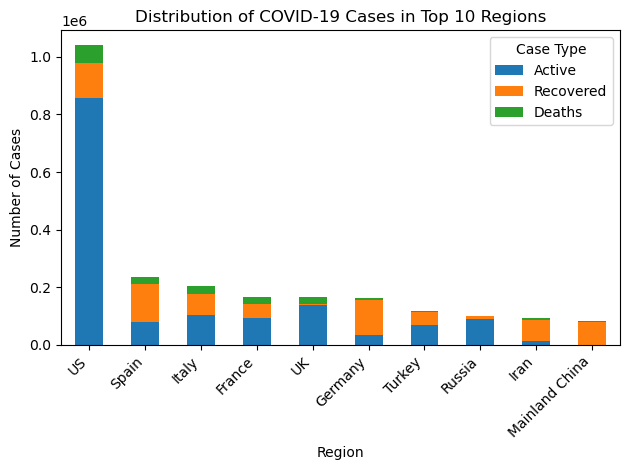

In [82]:
plt.figure(figsize=(12, 6))
region_data_top10 = region_data.head(10)
region_data_top10[['Active', 'Recovered', 'Deaths']].plot(kind='bar', stacked=True)
plt.title('Distribution of COVID-19 Cases in Top 10 Regions')
plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.legend(title='Case Type')
plt.xticks(range(10), region_data_top10['Region'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Visualization 3: Pie chart of top 5 regions by confirmed cases

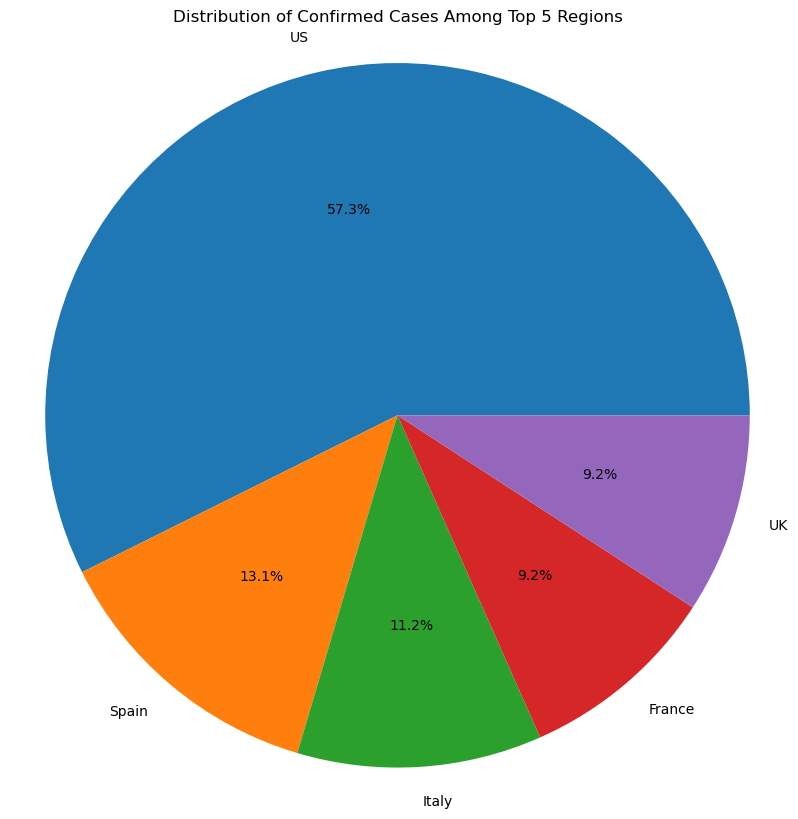

In [85]:
plt.figure(figsize=(10, 10))
top5_regions = region_data.head()
plt.pie(top5_regions['Confirmed'], labels=top5_regions['Region'], autopct='%1.1f%%')
plt.title('Distribution of Confirmed Cases Among Top 5 Regions')
plt.axis('equal')
plt.show()

### Identify regions with highest mortality and recovery rates

In [92]:
highest_mortality = region_data.loc[region_data['Mortality_Rate'].idxmax()]

In [94]:
highest_recovery = region_data.loc[region_data['Recovery_Rate'].idxmax()]

In [96]:
print(f"\nRegion with highest mortality rate: {highest_mortality['Region']} ({highest_mortality['Mortality_Rate']:.2f}%)")


Region with highest mortality rate: Nicaragua (23.08%)


In [98]:
print(f"Region with highest recovery rate: {highest_recovery['Region']} ({highest_recovery['Recovery_Rate']:.2f}%)")

Region with highest recovery rate: Cambodia (97.54%)
